# **INTRODUCTION**

Hello all !!! This is my first notebook in Kaggle. Here I have used the Red Wine Quality Dataset to analyse and predict using few classification methods like : 

1. SVM (Support Vector Machine)
2. Random Forest
3. XGBoost
4. Logistic Regression
5. Decision Tree Classifier

Hope y'all find this notebook useful. If you like this notebook, then please do upvote!

Happy learning ;))

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# **IMPORTING THE DATASET**

In [2]:
dataset = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

# **IMPORTING THE REQUIRED LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  matplotlib.pyplot import subplot
%matplotlib inline

from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

# **DIGGING DEEP INTO THE DATASET**

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.shape

(1599, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **WHAT CAN WE SAY FROM THIS ?**

1. All are numerical fields
2. Quaity is the dependent variable(discrete). All other fields are continuous.
3. Data is free from missing values

# **DATA VISUALIZATION**

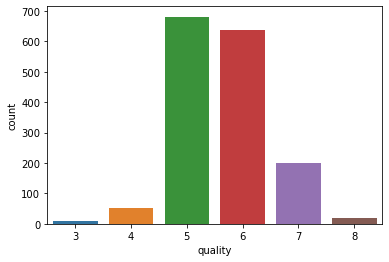

In [10]:
sns.countplot(dataset['quality'])

records with wine quality 5 & 6 are more

**Check the relationship between each variables**

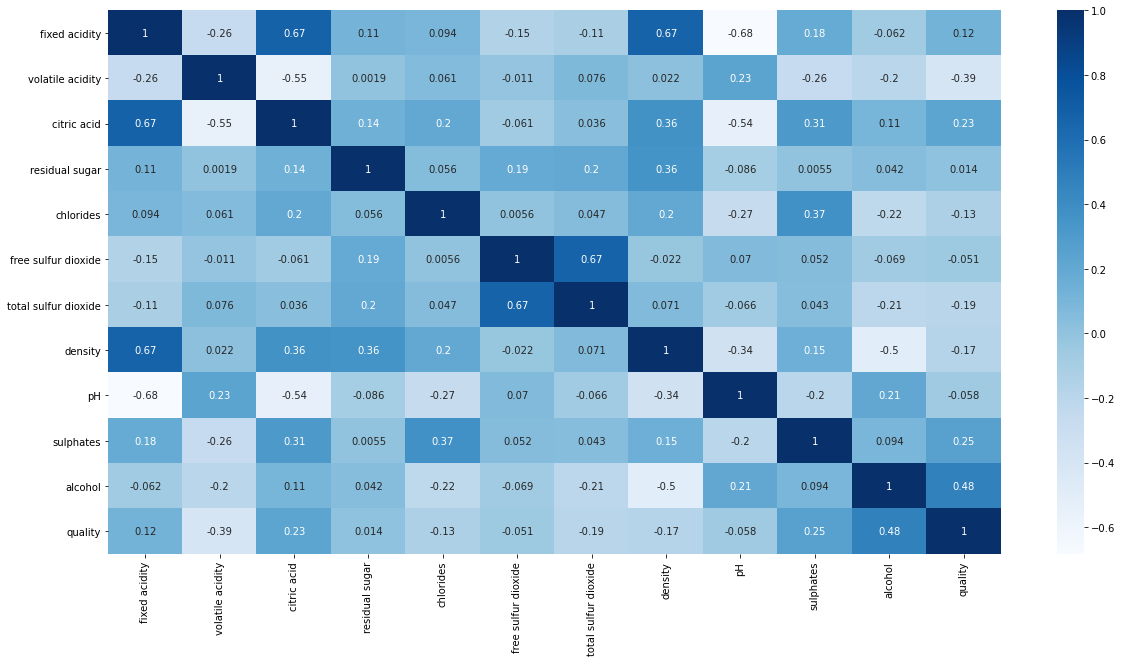

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True,cmap='Blues')
plt.show()

In [12]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


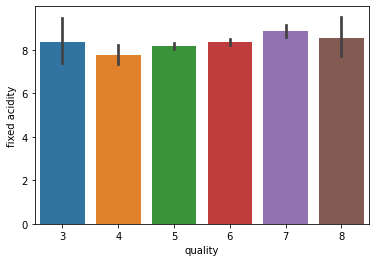

In [13]:
sns.barplot(y='fixed acidity', x='quality', data=dataset)

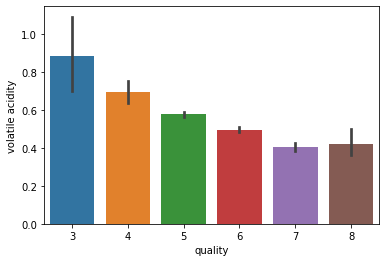

In [14]:
sns.barplot(y='volatile acidity', x='quality', data=dataset)

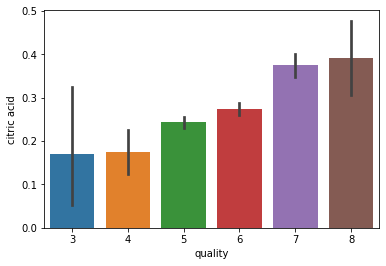

In [15]:
sns.barplot(y='citric acid', x='quality', data=dataset)

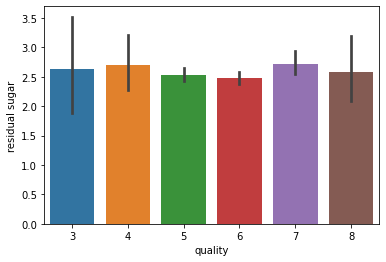

In [16]:
sns.barplot(y='residual sugar', x='quality', data=dataset)

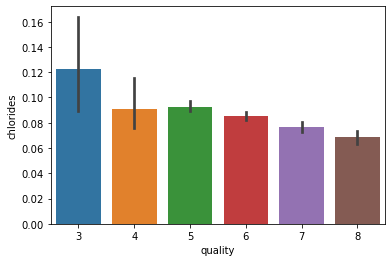

In [17]:
sns.barplot(y='chlorides', x='quality', data=dataset)

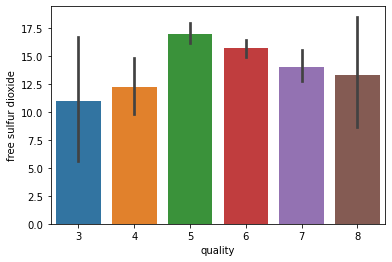

In [18]:
sns.barplot(y='free sulfur dioxide', x='quality', data=dataset)

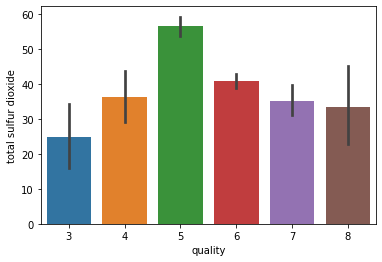

In [19]:
sns.barplot(y='total sulfur dioxide', x='quality', data=dataset)

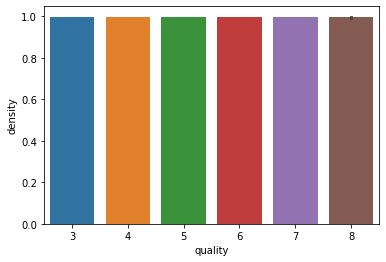

In [20]:
sns.barplot(y='density', x='quality', data=dataset)

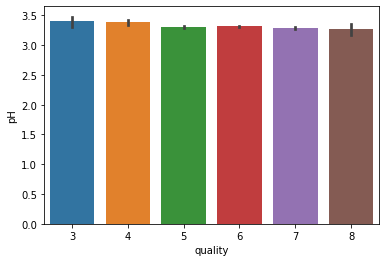

In [21]:
sns.barplot(y='pH', x='quality', data=dataset)

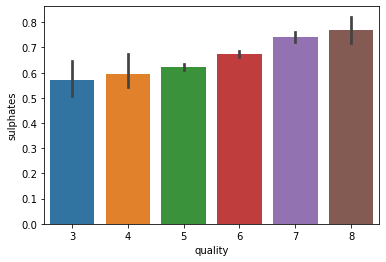

In [22]:
sns.barplot(y='sulphates', x='quality', data=dataset)

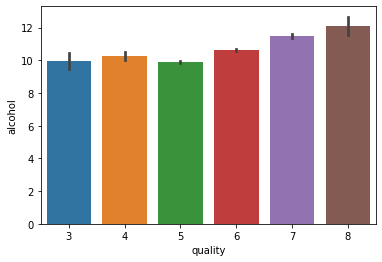

In [23]:
sns.barplot(y='alcohol', x='quality', data=dataset)

# **LET US NOW START PRE-PROCESSING OUR DATA**

**Checking the minimum and maximum value of quality**

In [24]:
dataset['quality'].min()

3

In [25]:
dataset['quality'].max()

8

In [26]:
values = (2, 6, 9)
qual = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = values, labels = qual)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**Now, we have 2 groups i.e. good quality and bad quality wine. This helps us with label encoding to classify data better.**

In [27]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [28]:
label_enc = LabelEncoder()
dataset['quality']=label_enc.fit_transform(dataset['quality'])

# **SPLITTING TRAINING AND TESTING DATA**

In [29]:
X = dataset.drop('quality',axis=1)
y = dataset['quality']

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

**Now, let us start by scaling the data and normalizing it to a particular range of values**

In [31]:
std_scale = StandardScaler()
xtrain = std_scale.fit_transform(xtrain)
xtest = std_scale.fit_transform(xtest)

# **CLASSIFICATION MODELS**

    1. SVM (Support Vector Machine)
    2. Random Forest
    3. XGBoost classifier

**1. SVM (SUPPORT VECTOR MACHINE)**

In [32]:
model = svm.SVC()
model.fit(xtrain,ytrain)
y0_pred = model.predict(xtest)
print(accuracy_score(ytest,y0_pred))

0.875


**2. RANDOM FOREST**

In [33]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
y1_pred = rf.predict(xtest)
print(accuracy_score(ytest,y1_pred))

0.88125


**3. XGBoost CLASSIFIER**

In [34]:
xgb = XGBClassifier(max_depth=3,n_estimators=200,learning_rate=0.5)
xgb.fit(xtrain,ytrain)
y2_pred = xgb.predict(xtest)
print(accuracy_score(ytest,y2_pred))

0.903125


**XGBoost classifier model has a 90.3% accuracy score which is higher than the other 2 models.**

# **CONFUSION MATRIX**

In [35]:
print(confusion_matrix(ytest,y2_pred))

[[264   9]
 [ 22  25]]


We have 9 + 22 = 31 false predictions!!!

# **LOGISTIC REGRESSION**

In [36]:
x=dataset.drop('quality', axis = 1)
y= dataset['quality']

In [37]:
from sklearn.preprocessing import MinMaxScaler

Normalize using MinMaxScaler to constrain values to between 0 and 1.

In [38]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit_transform(x)

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(xtrain,ytrain)

y_pred_log = classifier_log.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log, ytest)*100)

87.5


# **DECISION TREE CLASSIFIER**

In [41]:
from sklearn.tree import DecisionTreeClassifier

# doing pruning to avoid overfitting
classifier_tree=DecisionTreeClassifier(criterion ='gini', splitter = 'random',
                         max_leaf_nodes = 10, min_samples_leaf = 5, 
                         max_depth = 6)
model = classifier_tree.fit(xtrain, ytrain)

y_pred_tree = classifier_tree.predict(xtest)

print(accuracy_score(y_pred_tree, ytest)*100)

85.3125


# **CONCLUSION**

In [42]:
print(classification_report(ytest,y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



# **ACCURACY OF THE DIFFERENT CLASSIFICATION MODELS THAT WE'VE USED**

    1. SVM (Support Vector Machine) = 0.875 = 87.5%
    2. Random Forest = 0.8875 = 88.75%
    3. XGBoost = 0.903125 = 90.3%
    4. Logistic Regression 0.875 = 87.5%
    5. Decision Tree Classifier = 0.871875 = 87.1875%